In [0]:
# load the libraries
from vega_datasets import data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
# load the data and take a glance
movies_data = data.movies()
movies_data.head(3)

<class 'str'>


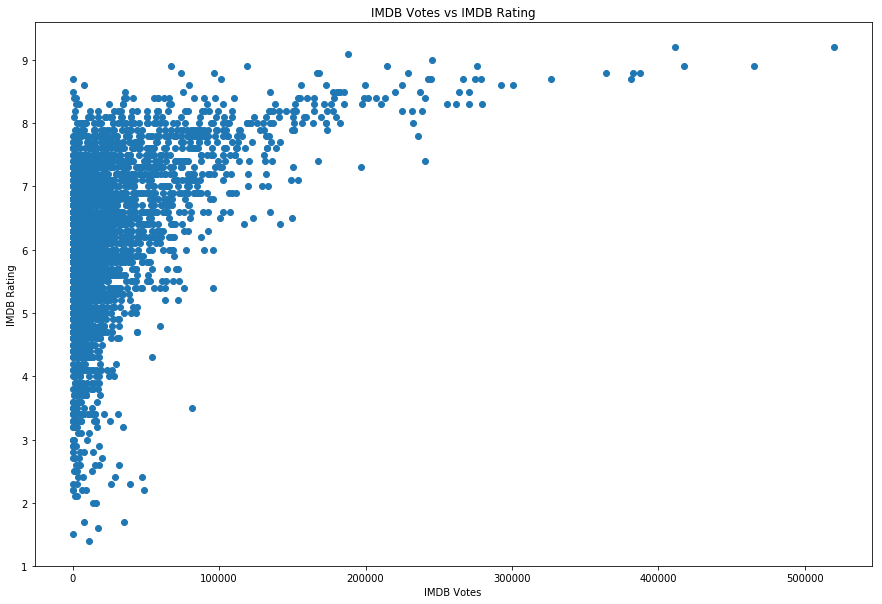

In [4]:
plt.figure(figsize=(15, 10))

plt.scatter(movies_data.IMDB_Votes, movies_data.IMDB_Rating)

plt.xlabel("IMDB Votes")
plt.ylabel("IMDB Rating")
plt.title("IMDB Votes vs IMDB Rating")
plt.show()

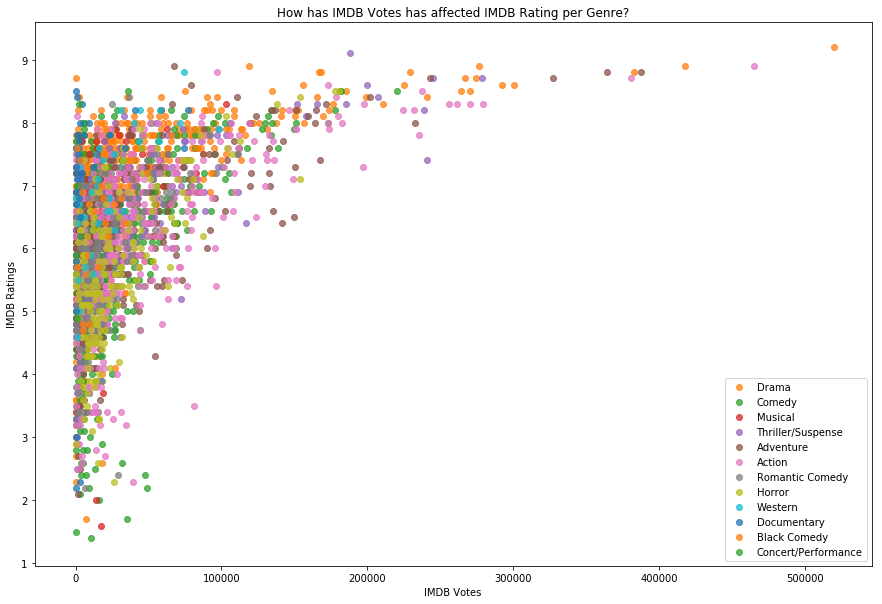

In [5]:
plt.figure(figsize=(15, 10))

genres = movies_data.Major_Genre.unique()
for genre in genres:
  data_sub = movies_data[movies_data.Major_Genre == genre]
  plt.scatter(data_sub.IMDB_Votes, data_sub.IMDB_Rating, label=genre, alpha=0.75)

plt.xlabel("IMDB Votes")
plt.ylabel("IMDB Ratings")
plt.title("How has IMDB Votes has affected IMDB Rating per Genre?")
plt.legend()
plt.show()

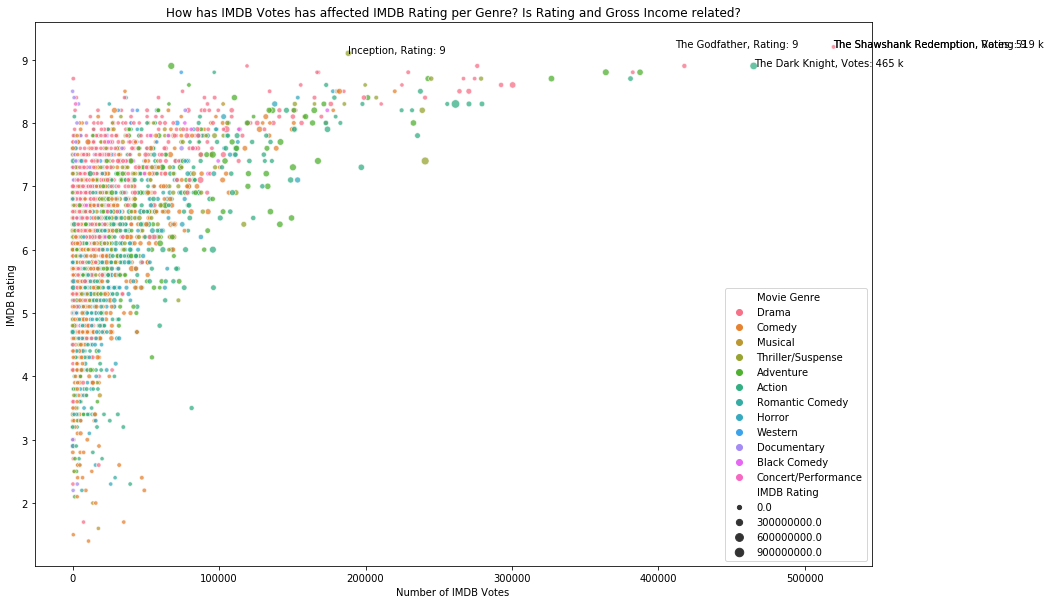

In [6]:
plt.figure(figsize=(15, 10))

g = sns.scatterplot(x="IMDB_Votes", y="IMDB_Rating", hue='Major_Genre', size='US_Gross', alpha=0.75, data=movies_data)

txt1 = "{}, Votes: {} k"
for i, movie in enumerate(movies_data.Title):
  if(movies_data.IMDB_Votes[i] > 450000):
    plt.text(movies_data.IMDB_Votes[i], movies_data.IMDB_Rating[i], txt1.format(movie, int(movies_data.IMDB_Votes[i]/1000)))

txt2 = "{}, Rating: {}"
for i, movie in enumerate(movies_data.Title):
  if(movies_data.IMDB_Rating[i] > 9):
    plt.text(movies_data.IMDB_Votes[i], movies_data.IMDB_Rating[i], txt2.format(movie, int(movies_data.IMDB_Rating[i])))

plt.xlabel("Number of IMDB Votes")
plt.ylabel("IMDB Rating")
plt.title("How has IMDB Votes has affected IMDB Rating per Genre? Is Rating and Gross Income related?")
l = g.legend()
l.texts[0].set_text("Movie Genre")
l.texts[13].set_text("IMDB Rating")
plt.savefig("Votes_vs_Rating.png")
plt.show()

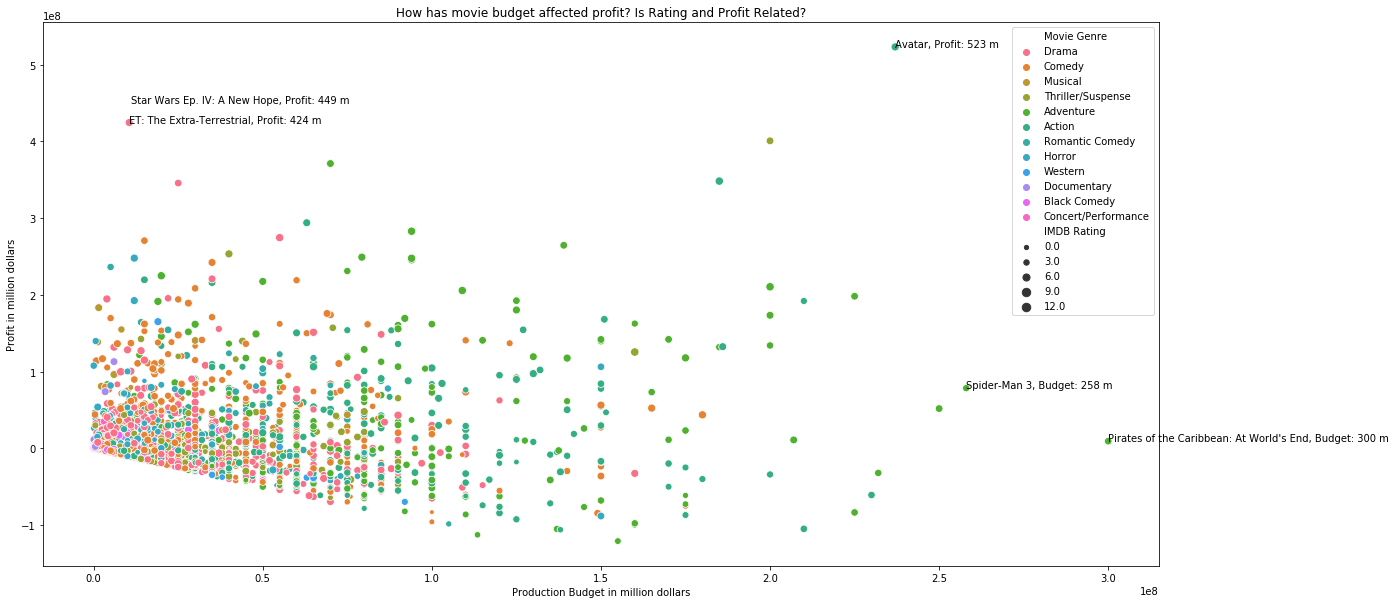

In [7]:
plt.figure(figsize=(20, 10))

movies_data['Profit'] = movies_data.US_Gross - movies_data.Production_Budget

g = sns.scatterplot(x="Production_Budget", y="Profit", hue='Major_Genre', size='IMDB_Rating', data=movies_data)

txt1 = "{}, Profit: {} m"
for i, movie in enumerate(movies_data.Title):
  if(movies_data.Profit[i] > 420000000):
    plt.text(movies_data.Production_Budget[i], movies_data.Profit[i], txt1.format(movie, int(movies_data.Profit[i]/1000000)))

txt2 = "{}, Budget: {} m"
for i, movie in enumerate(movies_data.Title):
  if(movies_data.Production_Budget[i] > 250000000):
    plt.text(movies_data.Production_Budget[i], movies_data.Profit[i], txt2.format(movie, int(movies_data.Production_Budget[i]/1000000)))

plt.xlabel("Production Budget in million dollars")
plt.ylabel("Profit in million dollars")
plt.title("How has movie budget affected profit? Is Rating and Profit Related?")
l = g.legend()
l.texts[0].set_text("Movie Genre")
l.texts[13].set_text("IMDB Rating")
plt.savefig("Budget_vs_Profit.png")
plt.show()

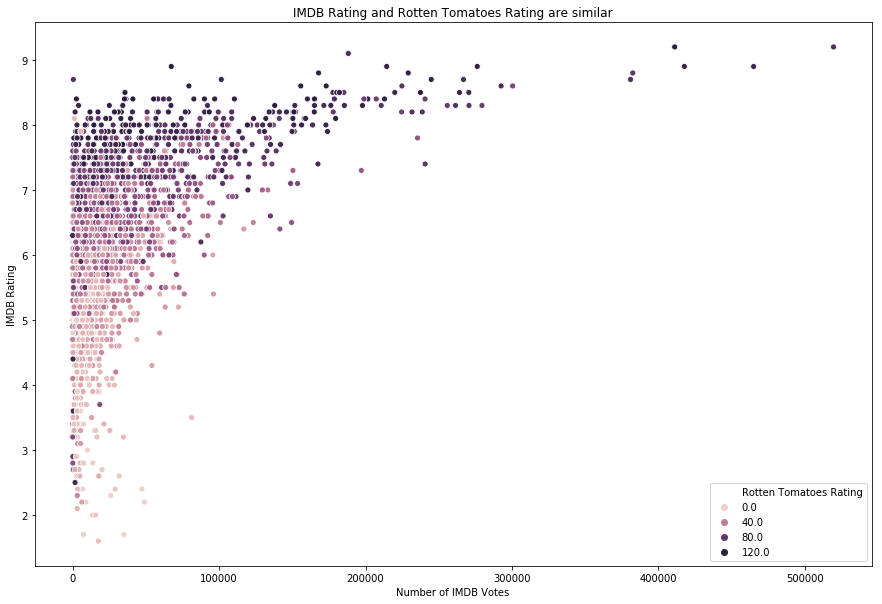

In [8]:
plt.figure(figsize=(15, 10))

g = sns.scatterplot(x="IMDB_Votes", y="IMDB_Rating", hue='Rotten_Tomatoes_Rating', data=movies_data)

plt.xlabel("Number of IMDB Votes")
plt.ylabel("IMDB Rating")
plt.title("IMDB Rating and Rotten Tomatoes Rating are similar")
l = g.legend()
l.texts[0].set_text("Rotten Tomatoes Rating")
plt.savefig("IMDB_Rating_vs_Rotten_Tomatoes_Rating.png")
plt.show()

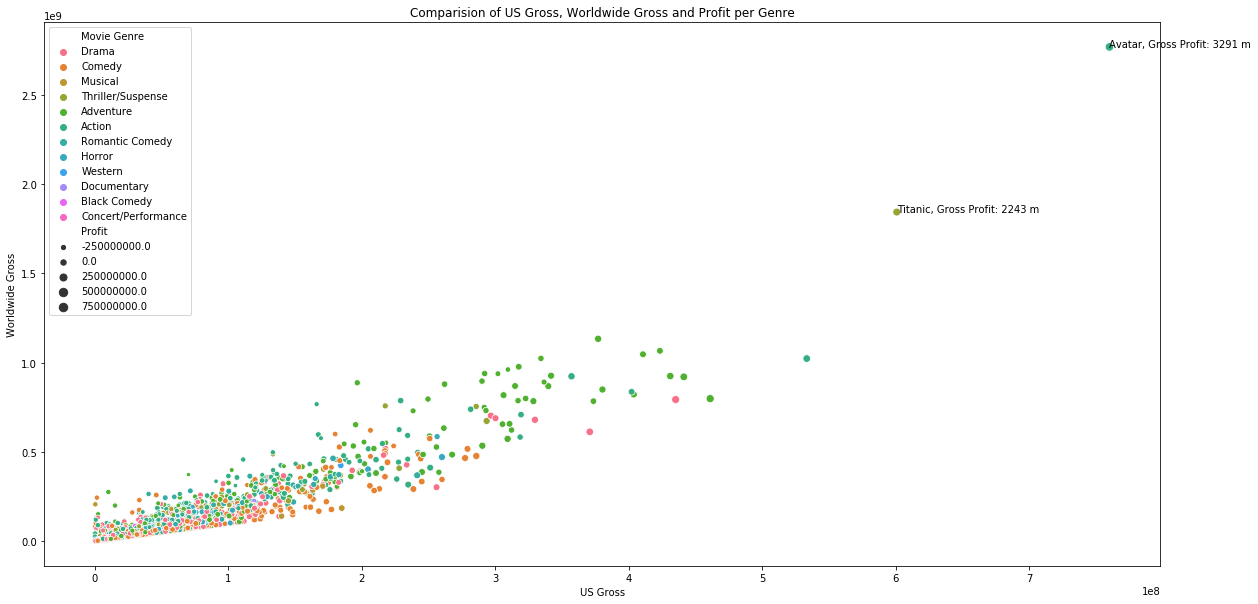

In [20]:
import pandas as pd

plt.figure(figsize=(20, 10))

x = np.linspace(0, 10, 1000)
y = np.sin(x)

list_of_tuples = list(zip(x, y))
df = pd.DataFrame(list_of_tuples, columns = ['X', 'Y'])
g = sns.lineplot(x='X', y = 'Y', data=df);

g = sns.scatterplot(x="US_Gross", y="Worldwide_Gross", hue='Major_Genre', size='Profit', data=movies_data)

txt1 = "{}, Gross Profit: {} m"
for i, movie in enumerate(movies_data.Title):
  if(movies_data.US_Gross[i] > 600000000):
    plt.text(movies_data.US_Gross[i], movies_data.Worldwide_Gross[i], txt1.format(movie, int((movies_data.Worldwide_Gross[i]+ movies_data.Profit[i])/1000000)))


plt.xlabel("US Gross")
plt.ylabel("Worldwide Gross")
plt.title("Comparision of US Gross, Worldwide Gross and Profit per Genre")
l = g.legend()
l.texts[0].set_text("Movie Genre")
l.texts[13].set_text("Profit")

plt.savefig("Gross_Profit.png")
plt.show()

In [18]:
#from google.colab import files
#files.download("Gross_Profit.png")

x = np.linspace(0, 10, 1000)
y = np.sin(x)

list_of_tuples = list(zip(x, y))
df = pd.DataFrame(list_of_tuples, columns = ['X', 'Y'])
# df.rename(index={0: "x", 1: "y"})
df.head()


,X,Y
0,0.00000,0.000000
1,0.01001,0.010010
2,0.02002,0.020019
3,0.03003,0.030026
4,0.04004,0.040029
